Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
4. Usando o computador para integrar: quadraturas
5. Usando o computador para aproximar: interpolação
    1. Interpolação local
    2. Interpolação de Lagrange
    3. Fenômeno de Runge e pontos de Chebyshev
    4. Transformada de Fourier
    5. Splines
    6. **Extrapolação e mínimos quadrados**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Excesso de dados

Já vimos que usar pontos demais para interpolar pode trazer problemas:
ao usar um polinômio de grau muito grande, este pode oscilar demasiadamente;
ao considerar muitos dados com um pouco de erro, este pode ser magnificado pela interpolação.

Entretanto, possuir mais informação deveria nos dar **mais** entendimento sobre o nosso problema, não?
Vamos, aqui, tentar entender como aproveitar estes dados suplementares.

In [2]:
def f(x):
    return 1/(1 + x**2)

In [3]:
xs = linspace(-5,5,30)
ys = f(xs)

# Mínimos quadrados

Em vez de buscarmos um polinômio de grau 29 que aproxime os 30 pontos acima,
vamos tentar algo novo:
gostaríamos de encontrar um polinômio de grau baixo que represente de forma aceitável esta função.
Por exemplo, suponhamos $P$ de grau 6.

O sistema linear que obteremos ao escrever as 30 equações $P(x_k) = y_k$ será,
muito provavelmente, impossível.
Temos 30 equações e apenas 7 variáveis para os coeficientes de $P$.
Entretanto, podemos tentar encontrar coeficientes que sejam os "melhores possível"
segundo algum critério.
Um critério bastante comum e prático (ou seja, rápido para o computador executar)
é o de mínimos quadrados:
$$ \text{tomaremos $c$ tal que } \left\| Ac - y \right\| \text{ seja o menor possível.} $$

O código é bastante similar ao da interpolação de Lagrange usando a matriz de Vandermonde,
exceto que agora também devemos dar o grau desejado da interpolação:

In [4]:
def polyfit_minsq(x,y,n):
    """ Calcula o polinômio de grau até  n  que melhor aproxima os pontos $(x_i, y_i)$. """
    assert(len(x) == len(y))
    maxx = max(x)
    minx = min(x)
    medx = (maxx + minx)/2
    diffs = array(x) - medx
    M = [ones_like(x)]
    for i in range(n):
        M.append(M[-1]*diffs)
    M = array(M).T
    a,_,_,_ = lstsq(M,y)

    def p(z):
        return Horner(z - medx,a[::-1])
    return p

In [5]:
def Horner(x, rcoeff):
    # Inicialização
    acc = rcoeff[0]
    for c in rcoeff[1:]:
        acc *= x
        acc += c
    return acc

### Exercício

Observe como os polinômios de graus diferentes aproximam $f(x) = \frac{1}{1 + x^2}$.
Lembre que esta é uma função para a qual o polinômio interpolador de Lagrange _diverge_
quando o grau aumenta, se usados pontos igualmente espaçados.

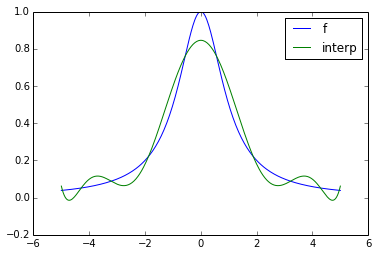

In [7]:
# Interpolando com grau 8

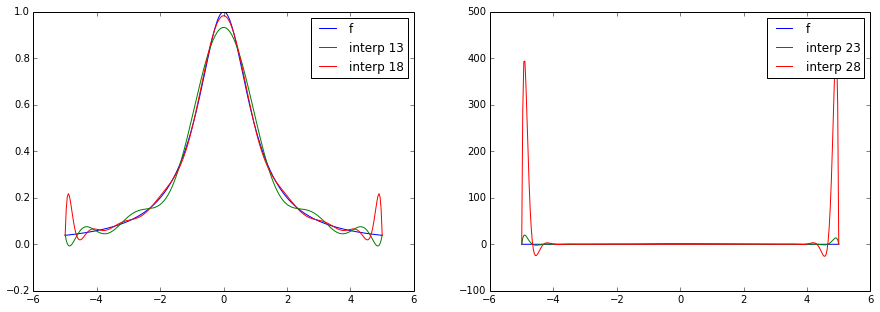

In [8]:
# Graus 13, 18, 23, 28

## Erros nos dados

E o que acontece se tivermos erros nos dados?
Suponhamos que os nossos dados sejam $y_k = f(x_k) + e(x_k)$,
onde $e$ é um pequeno erro.
Se tivermos "muita informação",
talvez sejamos capazes de "eliminar o erro".

Vejamos um primeiro exemplo, apenas para ilustrar:

In [9]:
def f(x):
    return x
def e(x):
    return sin(x**2 - 4*x)/100

In [10]:
import metodos

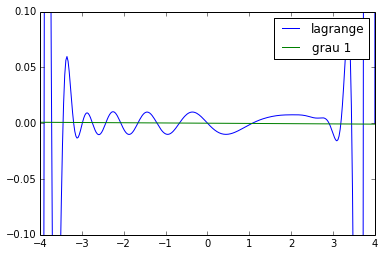

In [11]:
xs = linspace(-4,4,30)
ys = f(xs) + e(xs)
ts = linspace(-4,4,300)

p_i_l = metodos.lagrange(xs, ys)
f_int = polyfit_minsq(xs, ys, 1)

plot(ts, p_i_l(ts) - f(ts), label='lagrange')
plot(ts, f_int(ts) - f(ts), label='grau 1')
ylim([-.1,.1])
legend();

### Exercício

Use pontos de Chebyshev, para os quais a interpolação de Lagrange é bem mais estável.
Será que fica melhor do que um polinômio?

Você pode mexer em dois parâmetros:

- o número de nós de interpolação ($n$)
- o grau do polinômio de mínimos quadrados ($d$)

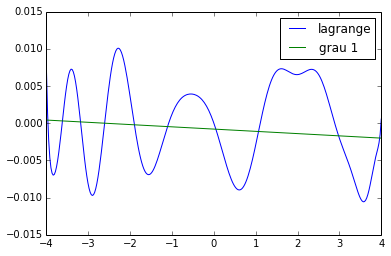

In [12]:
# 20 pontos, grau 1

Vejamos, agora, um exemplo mais sério.

In [17]:
def f(x):
    return 1/(1 + x**2)
def e(x):
    return random.normal(size=shape(x))/20

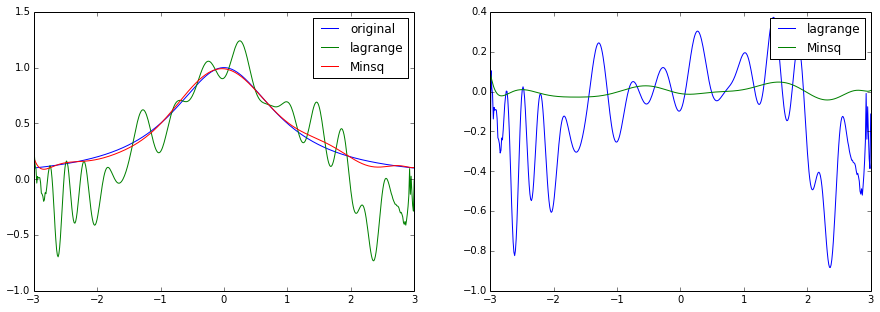

In [19]:
xs = metodos.chebyshev_nodes(-3,3,50)
ys = f(xs) + e(xs)

f_lagr = metodos.lagrange(xs, ys)
f_minsq = polyfit_minsq(xs, ys, 12)

ts = linspace(-3,3,500)
figure(figsize=(15,5))
subplot(1,2,1)
plot(ts, f(ts), label='original')
plot(ts, f_lagr(ts), label='lagrange')
plot(ts, f_minsq(ts), label='Minsq')
legend();

subplot(1,2,2)
plot(ts, f_lagr(ts) - f(ts), label='lagrange')
plot(ts, f_minsq(ts) - f(ts), label='Minsq')
legend();

### Exercício

Faça um gráfico do máximo erro absoluto em função de $n$ e $d$ para a função $f(x) = x$,
e também para $f(x) = \frac{1}{1 + x^2}$.
Quando o erro de mínimos quadrados é mínimo?

O gráfico com duas variáveis pode ser feito com `matshow()`,
que é mais simples (e mais rápido) do que os gráficos 3d.